<a href="https://colab.research.google.com/github/hsargoli/MyWorks/blob/main/image_processing_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



 brightness and contrast of the image may require improvement.


(<matplotlib.axes._subplots.AxesSubplot at 0x7f8cc6c55750>,
 <matplotlib.image.AxesImage at 0x7f8cc6b93410>)

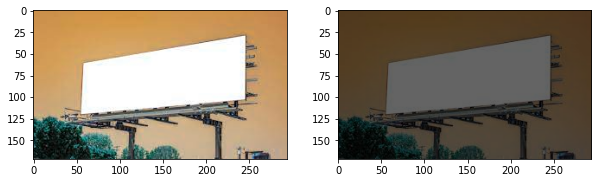

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('/content/billboard.jpg')
image_norm = cv2.normalize(image, None, alpha=0,beta=100, norm_type=cv2.NORM_MINMAX)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1),plt.imshow(image)
plt.subplot(1,2,2),plt.imshow(image_norm)

In [ ]:
import numpy as np
 
def PCA(X , num_components):
     
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
     
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced

# Data augmentation
data augmentation is the process of making minor alterations to existing data to increase its diversity without collecting new data.

It is a technique used for enlarging a dataset. Standard data augmentation techniques include horizontal & vertical flipping, rotation, cropping, shearing, etc.

Standard data augmentation techniques include horizontal & vertical flipping, rotation, cropping, shearing, etc.

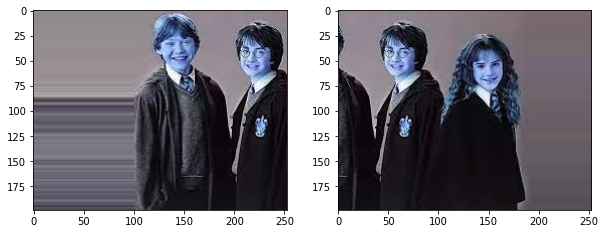

In [ ]:
import matplotlib.pyplot as plt
import cv2
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

image = cv2.imread('/content/drive/MyDrive/harry.jpg')

samples = expand_dims(image, 0)

# datagen = ImageDataGenerator(featurewise_center =True, featurewise_std_normalization = True)
# datagen = ImageDataGenerator(brightness_range=[0.5,2.0])
# datagen = ImageDataGenerator(rotation_range=20, fill_mode='nearest')
# datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
datagen = ImageDataGenerator(width_shift_range=[-100,60])

it = datagen.flow(samples, batch_size=1)

fig, im = plt.subplots(nrows=1, ncols=2, figsize=(10,10))
for i in range(2):

    # convert to unsigned integers
    image = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(image) 

In [ ]:
!pip install medpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 151 kB 21.6 MB/s 
     |████████████████████████████████| 48.4 MB 1.4 MB/s 
  Created wheel for medpy: filename=MedPy-0.4.0-cp37-cp37m-linux_x86_64.whl size=754474 sha256=71e7e2913485980f5c66f1a66c87ed561dc0395603784dfcca83458eb3ad4e4d
  Stored in directory: /root/.cache/pip/wheels/b0/57/3a/da1183f22a6afb42e11138daa6a759de233fd977a984333602
Successfully built medpy


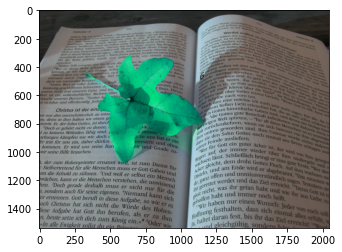

In [ ]:
# Object detection using color in HSV
import cv2
import numpy as np
import matplotlib.pylab as plt
bck = cv2.imread("/content/drive/MyDrive/a-leave.jpg")
img = cv2.imread("/content/drive/MyDrive/a-leave.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

mask = cv2.inRange(hsv, (5, 75, 25), (25, 255, 255))

imask = mask>0
orange = np.zeros_like(img, np.uint8)
orange[imask] = img[imask]

yellow = img.copy()
hsv[...,0] = hsv[...,0] + 20
yellow[imask] = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)[imask]
yellow = np.clip(yellow, 0, 255)

bckfish = cv2.bitwise_and(bck, bck, mask=imask.astype(np.uint8))
nofish = img.copy()
nofish = cv2.bitwise_and(nofish, nofish,
mask=(np.bitwise_not(imask)).astype(np.uint8))
nofish = nofish + bckfish

plt.imshow(yellow)

---------
# HISTOGRAM 


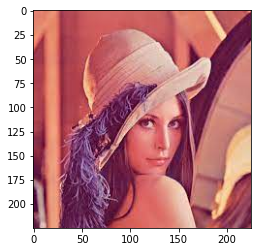

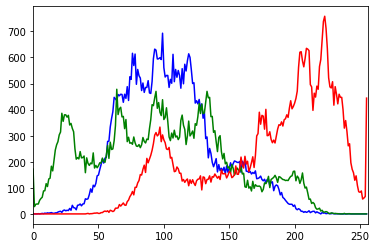

In [1]:
##############################
#### more common usage is to desire what value of  ####
#### thresholding to use whern converting images to a binary ####
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from PIL import Image
from pylab import array

image_path = '/content/drive/MyDrive/images/1.jpg'
im = array(Image.open(image_path).convert('L'))


img = cv.imread(image_path)
img1 = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img1)
plt.figure()
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

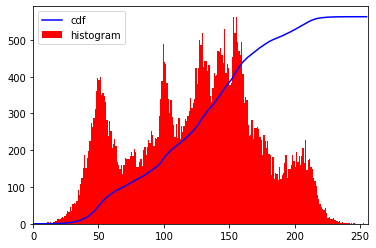

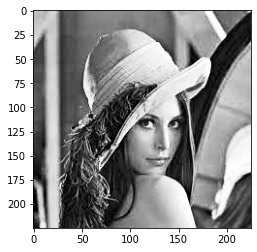

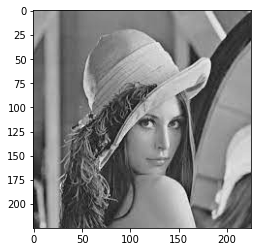

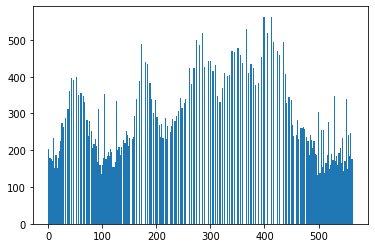

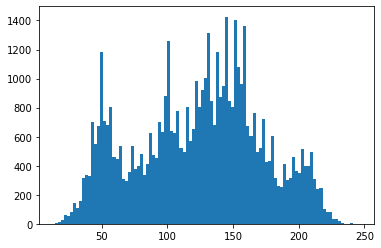

In [2]:
# https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html
# histogram equalization
####################################################################
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread(image_path,0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
img2 = cdf_normalized[im]

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')

plt.figure();plt.imshow(img2, cmap='gray')
plt.figure();plt.imshow(img, cmap='gray')
plt.figure();plt.hist(img2.flatten(),256)
plt.figure();plt.hist(im.flatten(),100) # second argument is number of bins
plt.show()

(array([ 497.,  469.,  491.,  607.,  282.,  565.,  325.,  796.,  424.,
         462.,  820.,  436., 1028.,  451., 1059.,  778., 1079.,  992.,
        1491., 1148., 1688., 1635.,  855., 1271.,  878.,  950.,  749.,
        1214.,  644., 1294., 1044.,  762.,  971.,  779., 1296., 1120.,
        1182., 1031., 1737., 1140., 1823., 1468.,  816., 1409.,  845.,
        1171., 1025., 1789., 1263., 1788., 1950., 1313., 1639., 1142.,
        2064., 1286., 1706., 1307., 2047., 1241., 2116., 1891., 1381.,
        1905.,  508., 1692.,  955., 1177.,  792., 1512., 1166.,  315.,
         917.,  837.,  885.,  825., 1374.,  756.,  849.,  695., 1396.,
        1060.,  841.,  949.,  713.,  614.,  554.,  730.,  536.,  558.,
         575.,  490.,  656.,  328.,  550.,  346.,  746.,  349.,  649.,
         530.]),
 array([  0.  ,   2.55,   5.1 ,   7.65,  10.2 ,  12.75,  15.3 ,  17.85,
         20.4 ,  22.95,  25.5 ,  28.05,  30.6 ,  33.15,  35.7 ,  38.25,
         40.8 ,  43.35,  45.9 ,  48.45,  51.  ,  53.55,  5

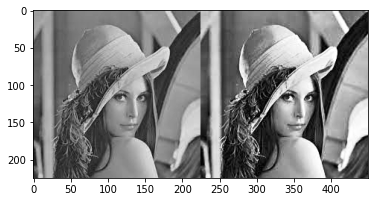

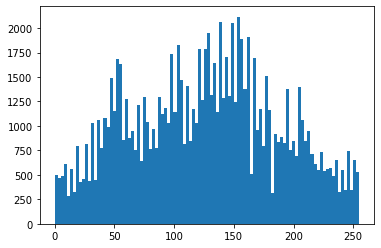

In [3]:
# Another (fast) way
img = cv.imread(image_path,0)
equ = cv.equalizeHist(img)
res = np.hstack((img,equ))
plt.imshow(res, cmap='gray')
plt.figure()
plt.hist(res.flatten(),100)

<Figure size 432x288 with 0 Axes>

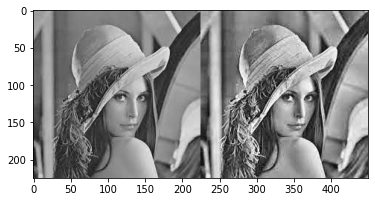

<Figure size 432x288 with 0 Axes>

In [5]:
'''
 adaptive histogram equalization is used. 
image is divided into small blocks called "tiles" 
(tileSize is 8x8 by default in OpenCV). 
Then each of these blocks are histogram equalized as usual. So in a small area,
  histogram would confine to a small region (unless there is noise).
   If noise is there, it will be amplified. To avoid this, contrast limiting
    is applied. If any histogram bin is above the specified contrast limit
     (by default 40 in OpenCV), those pixels are clipped and distributed uniformly 
     to other bins before applying histogram equalization. After equalization, to remove
      artifacts in tile borders, bilinear interpolation is applied.'''

import cv2 as  cv
import numpy as np
a = cv.imread(image_path,0)
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(a)
b = np.hstack((a,cl1))
plt.imshow(b, cmap='gray')
plt.figure()

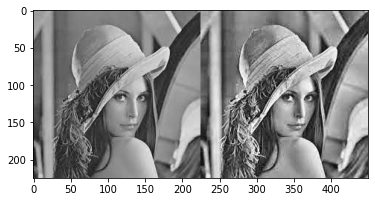

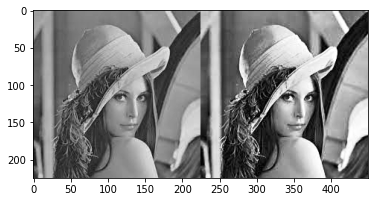

In [6]:

clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
a = np.hstack((img,cl1))
plt.imshow(a, cmap='gray')
plt.figure()
plt.imshow(res, cmap='gray')

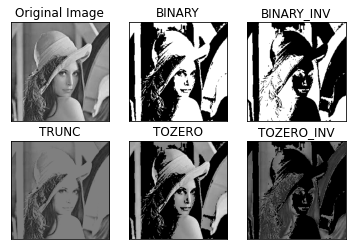

In [ ]:
# thresholding HISTOGRAM
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread(image_path,0)
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

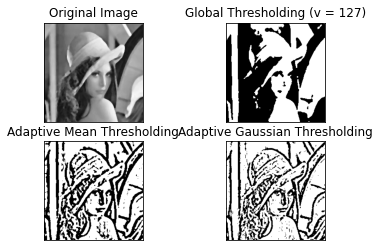

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread(image_path,0)
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

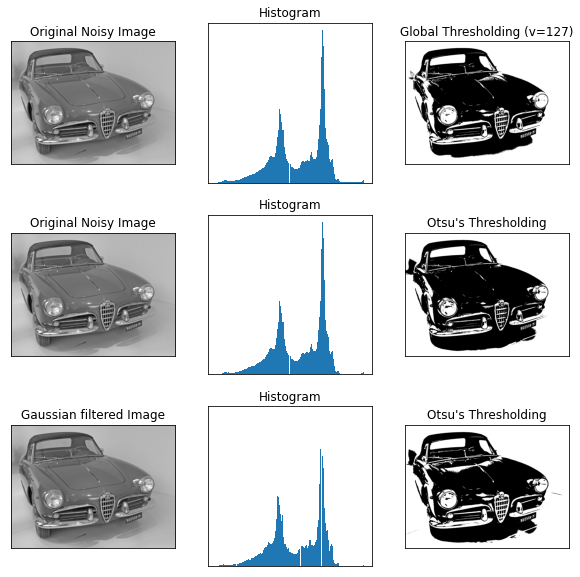

In [ ]:
# Otsu's algorithm tries to find a threshold value (t) which minimizes the weighted within-class variance 
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('/content/alfa-romeo-giulietta-spider-1558084.jpg',0)
# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

plt.figure(figsize = (10,10))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])

    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])

    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

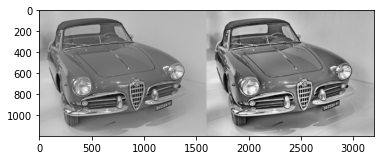

In [ ]:
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(blur)
a = np.hstack((blur,cl1))
plt.figure()
plt.imshow(a, cmap='gray')

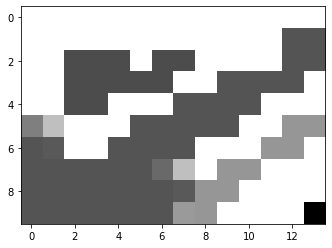

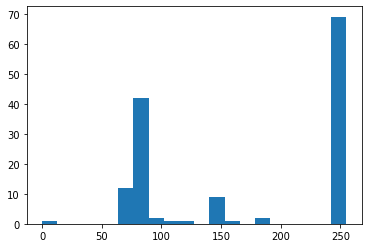

In [ ]:
##############################
# # # HISTOGRAM 
from PIL import Image
from pylab import array
import matplotlib.pyplot as plt
im = array(Image.open('/content/vsi3.jpg').convert('L'))
plt.imshow(im, cmap = 'gray')
plt.figure()

plt.hist(im.flatten(),20) # second argument is number of bins
plt.show()

In [ ]:
a = np.array([[123,123,123,123,123],
              [123,123,123,123,123],
              [123,123,123,123,123],
              [123,123,123,123,123]])
b = np.array([[123,123,123,123,123],
              [123,123,123,123,123],
              [123,123,123,123,123],
              [123,123,123,123,123]])
z = np.array([[0],
              [0],
              [0],
              [0],])
c = np.hstack((a,z,b))
c


array([[123, 123, 123, 123, 123,   0, 123, 123, 123, 123, 123],
       [123, 123, 123, 123, 123,   0, 123, 123, 123, 123, 123],
       [123, 123, 123, 123, 123,   0, 123, 123, 123, 123, 123],
       [123, 123, 123, 123, 123,   0, 123, 123, 123, 123, 123]])